# Alzheimers


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, ReLU, Softmax
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import image_dataset_from_directory, plot_model

In [2]:
class_names = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]

In [3]:
train_ds = image_dataset_from_directory(
    directory="../alzheimers_dataset/train/",
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="grayscale",
    batch_size=64,
    image_size=(200, 200),
    seed=0,
    validation_split=0.2,
    subset="training",
)

val_ds = image_dataset_from_directory(
    directory="../alzheimers_dataset/train/",
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="grayscale",
    batch_size=64,
    image_size=(200, 200),
    seed=0,
    validation_split=0.2,
    subset="validation",
)

test_ds = image_dataset_from_directory(
    directory="../alzheimers_dataset/test/",
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="grayscale",
    batch_size=64,
    image_size=(200, 200),
    seed=0,
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 5121 files belonging to 4 classes.
Using 1024 files for validation.
Found 1279 files belonging to 4 classes.


2024-07-17 16:32:06.237479: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


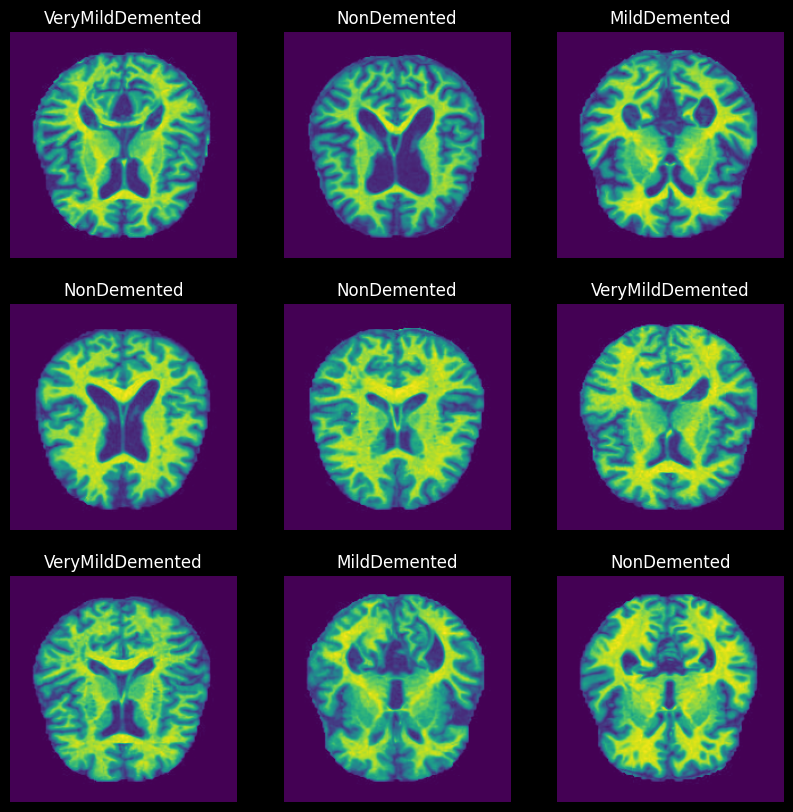

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # type: ignore
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

In [5]:
alzheimers = Sequential(
    layers=[
        Input(shape=(200, 200, 1)),
        Conv2D(filters=32, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Conv2D(filters=64, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Flatten(),
        Dense(128),
        ReLU(),
        Dense(4),
        Softmax(),
    ],
    name="alzheimers_cnn",
)

In [6]:
alzheimers.layers

[<Conv2D name=conv2d, built=True>,
 <ReLU name=re_lu, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <ReLU name=re_lu_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <ReLU name=re_lu_2, built=True>,
 <Dense name=dense_1, built=True>,
 <Softmax name=softmax, built=True>]

In [7]:
alzheimers.summary()

Model: "alzheimers_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 200, 200, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    20,480,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,499,460 (78.20 MB)

 Trainable params: 20,499,460 (78.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
alzheimers.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()],
)

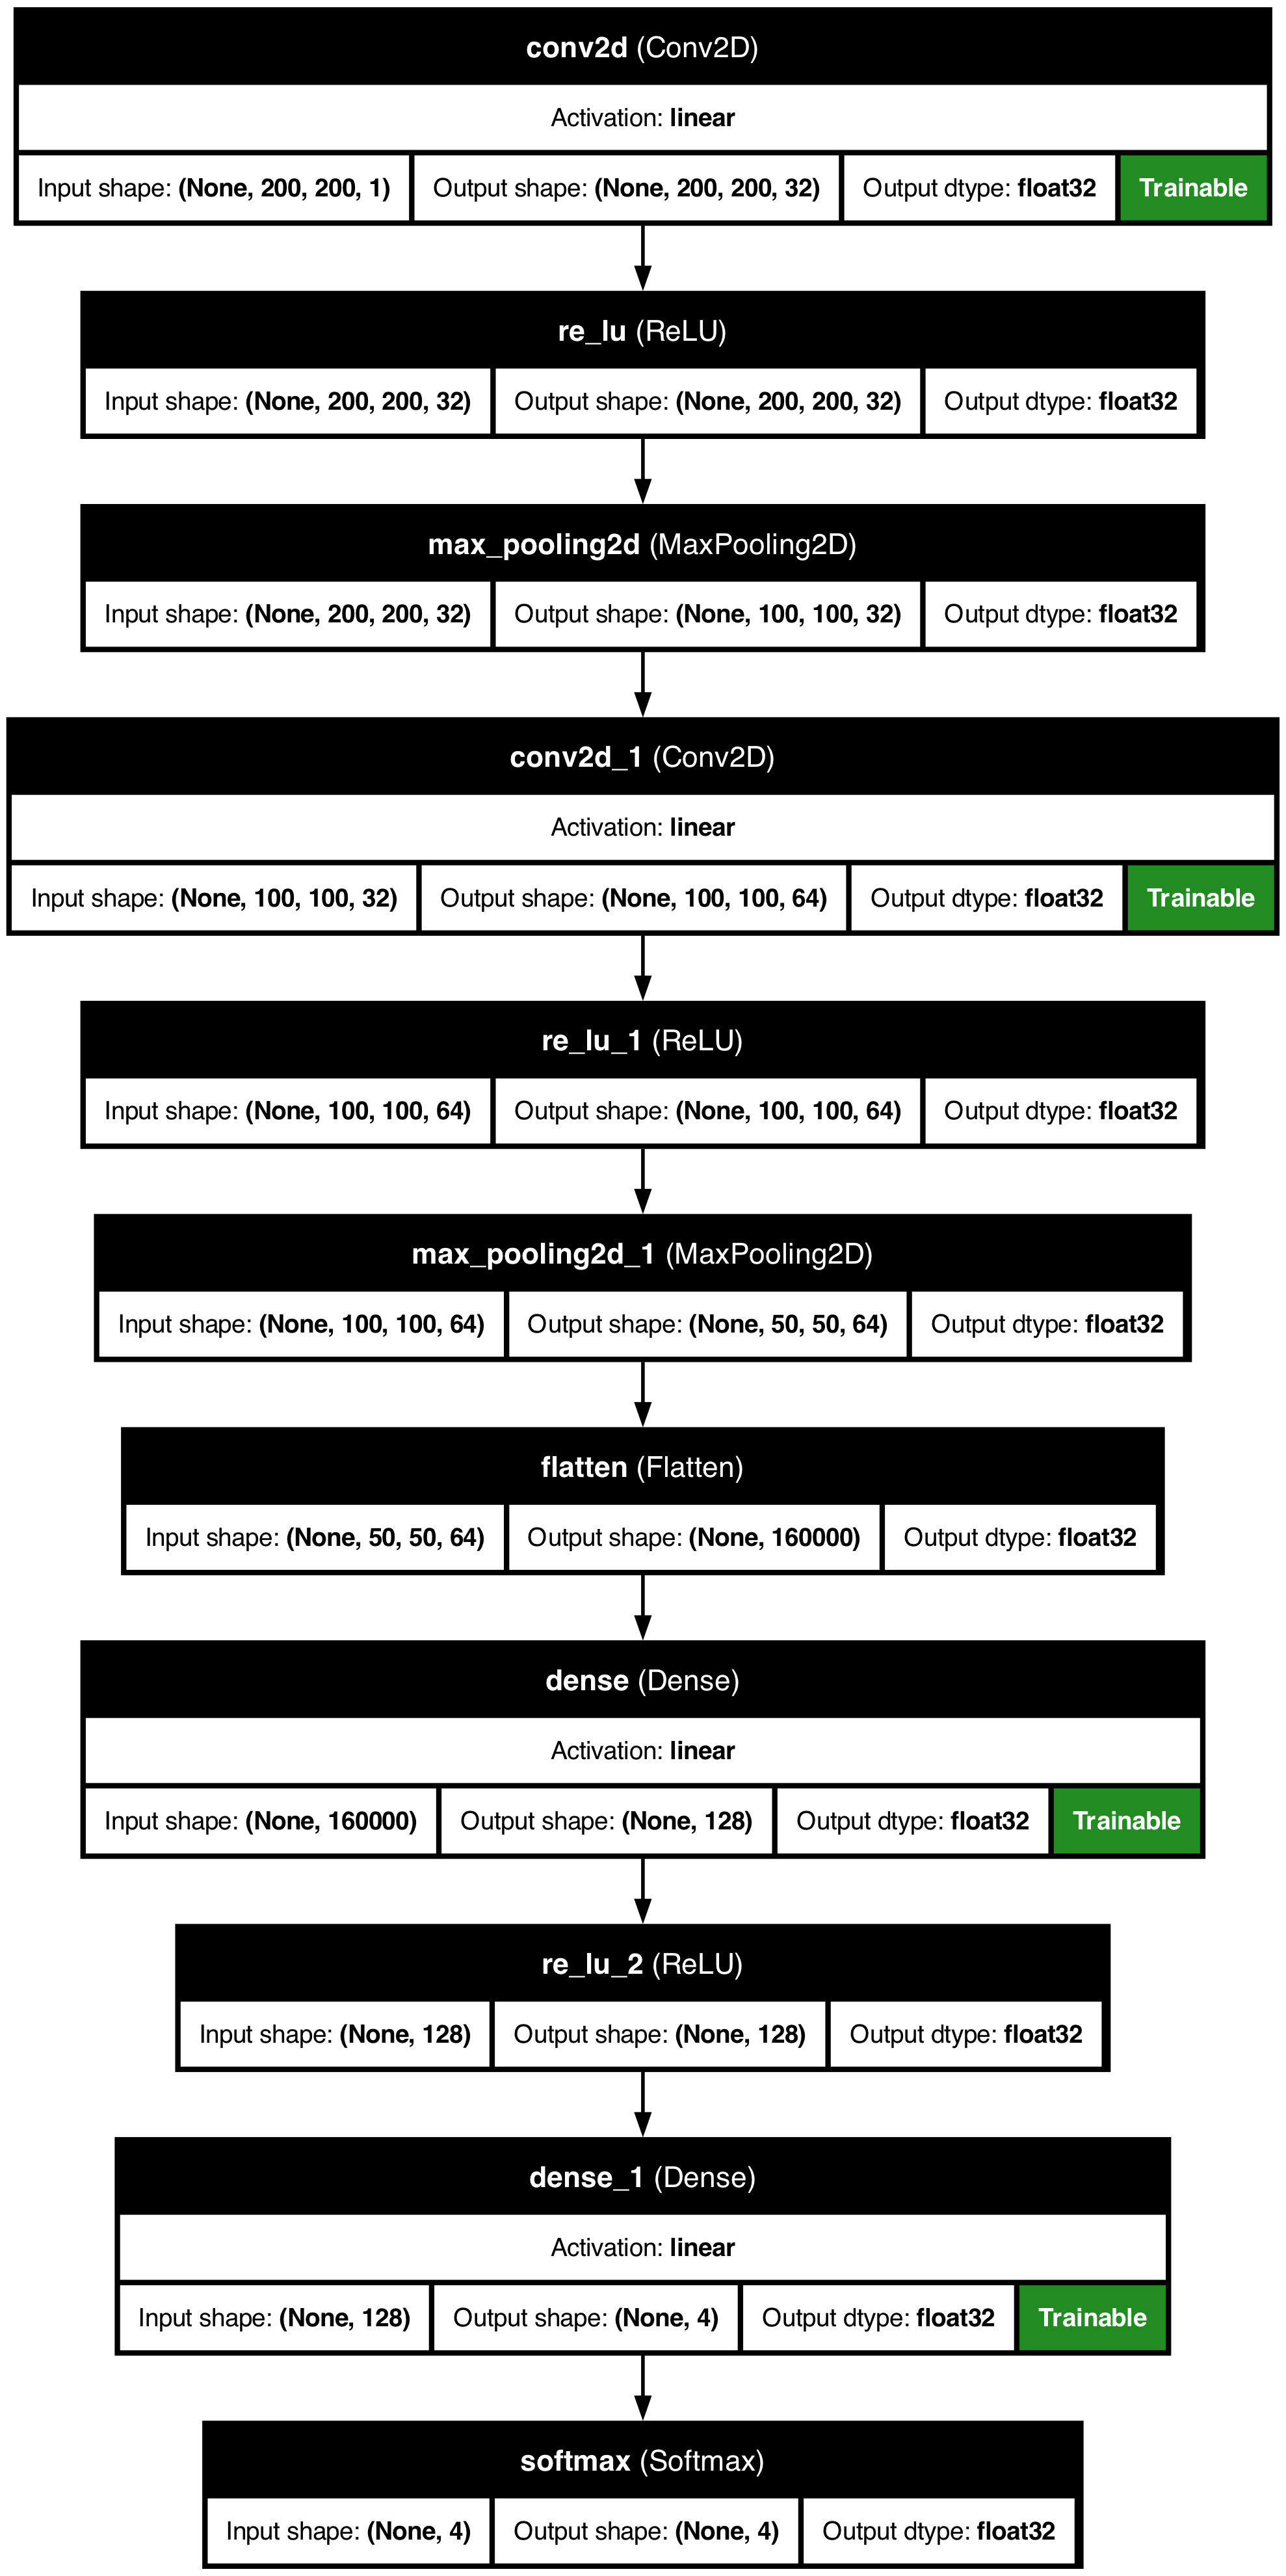

In [9]:
plot_model(
    alzheimers,
    to_file="Images/alzheimers_cnn.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [10]:
alzheimers_checkpoint_callback = ModelCheckpoint(
    filepath="../../../Models/alzheimers_cnn.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
alzheimers_tensorboard_callback = TensorBoard(
    log_dir="../../../Logs/alzheimers_cnn_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/alzheimers_cnn_logs"

alzheimers_csvlogger_callback = CSVLogger(
    "../../../Logs/alzheimers_cnn_logs/alzheimers_cnn_logs.csv"
)

alzheimers_history = alzheimers.fit(
    train_ds,
    batch_size=64,
    epochs=10,
    validation_data=val_ds,
    callbacks=[
        alzheimers_checkpoint_callback,
        alzheimers_tensorboard_callback,
        alzheimers_csvlogger_callback,
    ],
)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - categorical_accuracy: 0.3888 - loss: 265.0555 - val_categorical_accuracy: 0.5078 - val_loss: 1.0118
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - categorical_accuracy: 0.5303 - loss: 0.9757 - val_categorical_accuracy: 0.5566 - val_loss: 0.9772
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - categorical_accuracy: 0.5732 - loss: 0.9578 - val_categorical_accuracy: 0.5859 - val_loss: 0.9288
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 62s 961ms/step - categorical_accuracy: 0.5952 - loss: 0.8803 - val_categorical_accuracy: 0.6270 - val_loss: 0.8770
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 61s 939ms/step - categorical_accuracy: 0.6243 - loss: 0.8108 - val_categorical_accuracy: 0.6406 - val_loss: 0.8360
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 60s 920ms/step - categorical_accuracy: 0.6604 - loss: 0.7544 - val_categorical_accuracy: 0.5615 - val_loss: 0.9352
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 60s 929ms/step - categorical_accuracy: 0.6822 - lo

In [11]:
alzheimers_train_loss = alzheimers_history.history["loss"]
alzheimers_train_acc = alzheimers_history.history["categorical_accuracy"]
alzheimers_val_loss = alzheimers_history.history["val_loss"]
alzheimers_val_acc = alzheimers_history.history["val_categorical_accuracy"]


print("Training loss:", np.mean(alzheimers_train_loss))
print("Validation loss:", np.mean(alzheimers_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(alzheimers_train_acc), np.std(alzheimers_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(alzheimers_val_acc), np.std(alzheimers_val_acc))
)

Training loss: 9.362050968408585
Validation loss: 0.8750834405422211
0.645716 Training accuracy with a standard deviation of 0.099475
0.611035 Validation accuracy with a standard deviation of 0.058949


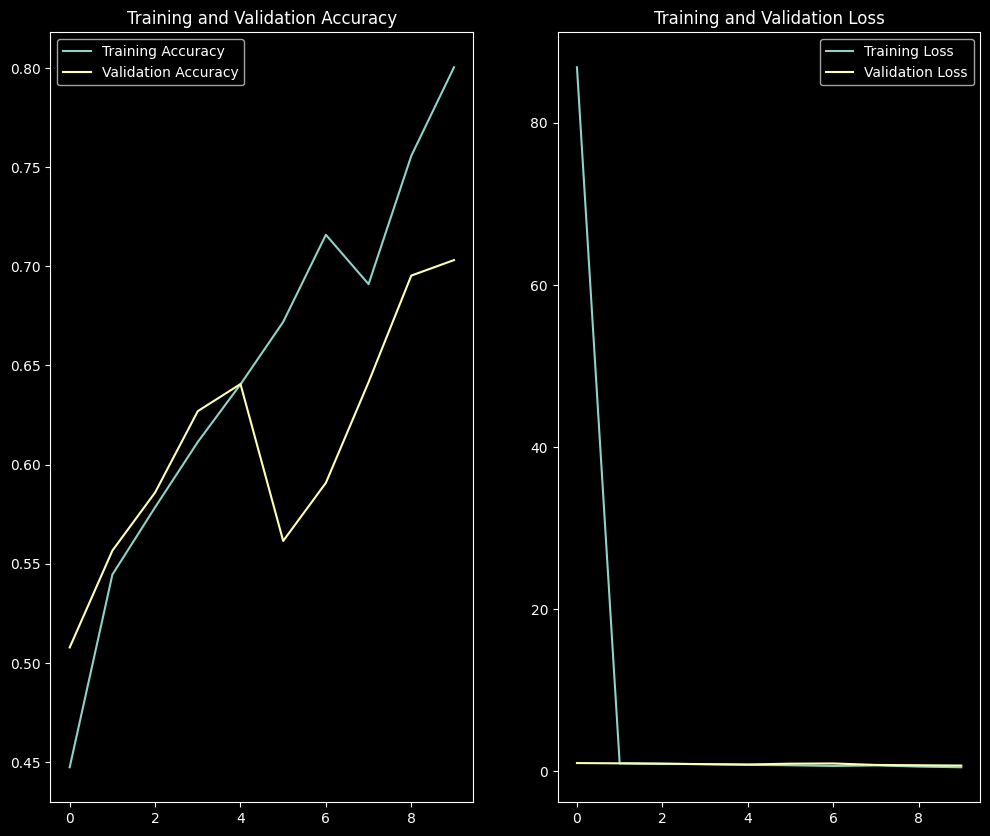

In [12]:
epochs_range = range(10)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, alzheimers_train_acc, label="Training Accuracy")
plt.plot(epochs_range, alzheimers_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, alzheimers_train_loss, label="Training Loss")
plt.plot(epochs_range, alzheimers_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("Images/alzheimers_acc_loss.png", bbox_inches="tight")

In [13]:
alzheimers_test_loss, alzheimers_test_accuracy = alzheimers.evaluate(test_ds)
print("Test loss:", alzheimers_test_loss)
print("Test accuracy:", alzheimers_test_accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - categorical_accuracy: 0.5169 - loss: 1.3954
Test loss: 1.3730285167694092
Test accuracy: 0.5144644379615784


In [14]:
y_pred = alzheimers.predict(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step
